<a href="https://colab.research.google.com/github/olumor10/Rede_Neural_Perceptron/blob/main/Atividade_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='gold'> **Redes Neurais Artificiais: *Perceptron*** </font>

---
**Referência:**

SILVA, Ivan Nunes da; SPATTI, Danilo Hernane; FLAUZINO, Rogério Andrade. **Redes neurais artificiais:** para engenharia e ciências aplicadas. São Paulo: Artliber, 2010.

---
**Dupla:**

- Rafael Azevedo

- Rômulo Rodrigues

---


Arquitetura do *Perceptron* para o projeto

<img src="https://lh3.googleusercontent.com/pw/AP1GczMYzi2ugdKDyUZgBc3mS_s80LMpNmKGGX8lOVVAAQNsv-BEnJU9L5kFdzreNCAgi4LnXICLR4RpXG4oKSyD-cxpA8O241oepYrmlQKKDcDx1fz1_p2L94L9zPjGF-mX2QLO_sDLT0mwcgrJO_NfkfD2=w606-h289-s-no-gm?authuser=0" alt="Texto alternativo" width="300px" height="">

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# Estilo do gráfico plt
plt.style.use('dark_background')

---
## <font color='Yellow'> Dados de treinamento </font>

In [ ]:
# Importando dados e salvando como Dataframe para treinamento do moelo
df_treino = pd.read_csv('/content/drive/MyDrive/apendice1.csv', index_col=0)
print(df_treino)

             x1      x2       x3    d
Amostra                              
1       -0.6508  0.1097   4.0009 -1.0
2       -1.4492  0.8896   4.4005 -1.0
3        2.0850  0.6876  12.0710 -1.0
4        0.2626  1.1476   7.7985  1.0
5        0.6418  1.0234   7.0427  1.0
6        0.2569  0.6730   8.3265 -1.0
7        1.1155  0.6043   7.4446  1.0
8        0.0914  0.3399   7.0677 -1.0
9        0.0121  0.5256   4.6316  1.0
10      -0.0429  0.4660   5.4323  1.0
11       0.4340  0.6870   8.2287 -1.0
12       0.2735  1.0287   7.1934  1.0
13       0.4839  0.4851   7.4850 -1.0
14       0.4089 -0.1267   5.5019 -1.0
15       1.4391  0.1614   8.5843 -1.0
16      -0.9115 -0.1973   2.1962 -1.0
17       0.3654  1.0475   7.4858  1.0
18       0.2144  0.7515   7.1699  1.0
19       0.2013  1.0014   6.5489  1.0
20       0.6483  0.2183   5.8991  1.0
21      -0.1147  0.2242   7.2435 -1.0
22      -0.7970  0.8795   3.8762  1.0
23      -1.0625  0.6366   2.4707  1.0
24       0.5307  0.1285   5.6883  1.0
25      -1.2

In [ ]:
# Salvando os dados de entrada e saída em variáveis separadas
X_treino = df_treino[['x1', 'x2', 'x3']].values
d_treino = df_treino[['d']].values

# Mostrando os valores únicos de (d)
valores_unicos = np.unique(d_treino, return_counts=True)
print(f"valor: {valores_unicos[0][0]}, contagem: {valores_unicos[1][0]}")
print(f"valor: {valores_unicos[0][1]}, contagem: {valores_unicos[1][1]}")

valor: -1.0, contagem: 14
valor: 1.0, contagem: 16


In [ ]:
# Gráfido 3D das entradas por classe
fig = px.scatter_3d(df_treino, x='x1', y='x2', z='x3',
                    color=df_treino['d'].map({-1: "Óleo P1 (-1)", 1: "Óleo P2 (1)"}),
                    opacity=0.7, size_max=10,
                    color_discrete_map={"Óleo P1 (-1)": "blue", "Óleo P2 (1)": "red"})

fig.update_layout(scene=dict(
    xaxis_title='x1',
    yaxis_title='x2',
    zaxis_title='x3',
    bgcolor="black"
    ),
    title="Dados de treino",
    template="plotly_dark",
    legend_title_text='Classes',
    width=600,
    height=400,
    margin=dict(l=0, r=0, b=0, t=50)
)
fig.show()

---
## <font color='Yellow'> Dados de validação </font>

In [ ]:
df_validacao = pd.read_csv('/content/drive/MyDrive/tabela3_3.csv', index_col=0, usecols=range(4))
print(df_validacao)

             x1      x2      x3
Amostra                        
1       -0.3665  0.0620  5.9891
2       -0.7842  1.1267  5.5912
3        0.3012  0.5611  5.8234
4        0.7757  1.0648  8.0677
5        0.1570  0.8028  6.3040
6       -0.7014  1.0316  3.6005
7        0.3748  0.1536  6.1537
8       -0.6920  0.9404  4.4058
9       -1.3970  0.7141  4.9263
10      -1.8842 -0.2805  1.2548


In [ ]:
# salvando os dados de validação
X_validacao = df_validacao[['x1', 'x2', 'x3']].values

---
## <font color='Yellow'> Modelo </font>

In [ ]:
class Perceptron:
  def __init__(self, taxa_aprendizagem=0.01):

    np.random.seed(10) # definir uma semente para geração dos numeros aleatórios

    self.taxa_aprendizagem = taxa_aprendizagem
    self.pesos_iniciais = None
    self.pesos = None
    self.erros_por_epoca = []
    self.n_epocas = None

  def funcao_ativacao(self, u):
    # Função degrau bipolar
    return np.where(u >= 0, 1, -1)

  def treinar(self, X: np.ndarray, d: np.ndarray):
    # Inicializar o vetor de pesos com valores aleatórios pequenos
    self.pesos = np.random.rand(X.shape[1] + 1).reshape(1, -1)   # cria um vetor linha com 4 pesos, no qual o primeiro peso é para o bias.
    self.pesos_iniciais = self.pesos.copy()

    epoca = 0

    while True:
      erro = 0

      for xi, di in zip(X, d):
        # Adicionar o bias (-1) ao vetor de entrada
        xi = np.insert(xi, 0, -1)

        # Calcular a saída do Perceptron
        u = np.dot(self.pesos, xi) # realiza o produto escalar entre os dois arrays, obtendo-se um único número (potencial de ativação).
        y = self.funcao_ativacao(u)

        # Atualizar os pesos usando a regra de Hebb
        if y != di:
          self.pesos += self.taxa_aprendizagem * (di - y) * xi
          erro += 1

      self.erros_por_epoca.append(erro) # armazena o número de erros cometidos pelo modelo durante cada época de treinamento.
      epoca += 1

      if erro == 0:
        print(f'Época: {epoca}')
        print(f'Vetor de pesos iniciais: {self.pesos_iniciais}')
        print(f'Vetor de pesos finais: {self.pesos}')
        break

  def classificar(self, X: np.ndarray):
      pesos_ajustados = self.pesos.copy()

      for i, xi in enumerate(X):
        xi = np.insert(xi, 0, -1) # Adiciona o bias (-1) ao vetor de entrada
        u = np.dot(pesos_ajustados, xi)
        y = self.funcao_ativacao(u)

        if y == -1:
          print(f'A amostra {i+1} pertence a classe P1 (-1)')
        else:
          print(f'A amostra {i+1} pertence a classe P2 (1)')

  def plotar_erros(self):
      plt.plot(range(1, len(self.erros_por_epoca) + 1), self.erros_por_epoca, marker='o', markersize=5, color='cyan', alpha=0.7, linestyle='--')
      plt.xlabel('Época')
      plt.ylabel('Número de erros')
      plt.title('Erros por Época', fontsize=15)
      plt.show()

---
## <font color='Yellow'> Treinamento do modelo </font>


In [ ]:
modelo_perceptron = Perceptron(taxa_aprendizagem=0.01)
modelo_perceptron.treinar(X_treino, d_treino)

Época: 447
Vetor de pesos iniciais: [[0.77132064 0.02075195 0.63364823 0.74880388]]
Vetor de pesos finais: [[-3.12867936  1.61669995  2.52421423 -0.74714412]]


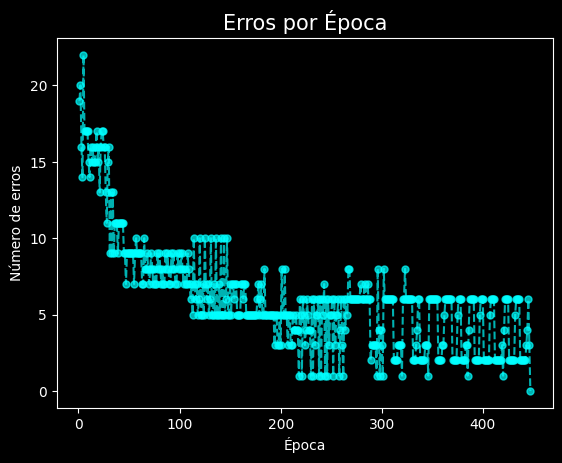

In [ ]:
modelo_perceptron.plotar_erros()

---
## <font color='Yellow'> Classificação das amostras de validação </font>

In [ ]:
modelo_perceptron.classificar(X_validacao)

A amostra 1 pertence a classe P1 (-1)
A amostra 2 pertence a classe P2 (1)
A amostra 3 pertence a classe P2 (1)
A amostra 4 pertence a classe P2 (1)
A amostra 5 pertence a classe P2 (1)
A amostra 6 pertence a classe P2 (1)
A amostra 7 pertence a classe P1 (-1)
A amostra 8 pertence a classe P2 (1)
A amostra 9 pertence a classe P1 (-1)
A amostra 10 pertence a classe P1 (-1)
